In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from env import get_db_url
import acquire as a

# Acquire and Summarize 

## Question 1 

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
def new_zillow_data():
    '''
    This function reads the zillow data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = ''' SELECT *
        FROM properties_2017 prop
        JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid
            ) pred USING(parcelid)
        JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
                          AND pred.max_transactiondate = predictions_2017.transactiondate
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL'''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('zillow'))

    # Save data to csv 
    filepath = Path('zillow.csv')
    filepath.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(filepath, index =False)
    
    return df

In [3]:
df = a.new_zillow_data()

## Question 2 

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)



In [4]:
df.describe(include='all')

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
count,76.000000,47.0,52319.0,33849.000000,0,70.00000,13615.000000,5.231900e+04,5.231900e+04,47.000000,...,5.231900e+04,52319.000000,52319,13615,70,0,33849,52319,47,76
unique,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,257,4,5,0,9,1,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-06-30,Central,Contemporary,NaN,Central,Single Family Residential,Basement,Frame
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,809,11873,62,NaN,20689,52319,47,75
mean,5.973684,7.0,261.0,3.965523,NaN,7.10000,2.439589,1.299682e+07,1.496888e+06,678.978723,...,1.299682e+07,0.018136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.229416,0.0,0.0,2.562644,NaN,2.66567,3.847925,3.350951e+06,8.594310e+05,711.825226,...,3.350951e+06,0.176904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,7.0,261.0,1.000000,NaN,2.00000,1.000000,1.071186e+07,3.490000e+02,38.000000,...,1.071186e+07,-4.655420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.000000,7.0,261.0,2.000000,NaN,7.00000,1.000000,1.151017e+07,7.575810e+05,263.500000,...,1.151017e+07,-0.024702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.000000,7.0,261.0,2.000000,NaN,7.00000,1.000000,1.257825e+07,1.500095e+06,512.000000,...,1.257825e+07,0.006935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.000000,7.0,261.0,7.000000,NaN,7.00000,1.000000,1.413036e+07,2.241248e+06,809.500000,...,1.413036e+07,0.040599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   storytypeid                   47 non-null     float64
 2   propertylandusetypeid         52319 non-null  float64
 3   heatingorsystemtypeid         33849 non-null  float64
 4   buildingclasstypeid           0 non-null      object 
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13615 non-null  float64
 7   parcelid                      52319 non-null  int64  
 8   id                            52319 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52319 non-null  float64
 11  bedroomcnt                    52319 non-null  float64
 12  buildingqualitytypeid         33654 non-null  float64
 13  c

In [6]:
df.isnull()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,True,True,False,True,True,True,True,False,False,True,...,False,False,False,True,True,True,True,False,True,True
1,True,True,False,True,True,True,True,False,False,True,...,False,False,False,True,True,True,True,False,True,True
2,True,True,False,True,True,True,True,False,False,True,...,False,False,False,True,True,True,True,False,True,True
3,True,True,False,False,True,True,True,False,False,True,...,False,False,False,True,True,True,False,False,True,True
4,True,True,False,False,True,True,False,False,False,True,...,False,False,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,True,True,False,False,True,True,True,False,False,True,...,False,False,False,True,True,True,False,False,True,True
52315,True,True,False,False,True,True,True,False,False,True,...,False,False,False,True,True,True,False,False,True,True
52316,True,True,False,True,True,True,True,False,False,True,...,False,False,False,True,True,True,True,False,True,True
52317,True,True,False,False,True,True,False,False,False,True,...,False,False,False,False,True,True,False,False,True,True


In [7]:
df.isnull().sum()

typeconstructiontypeid    52243
storytypeid               52272
propertylandusetypeid         0
heatingorsystemtypeid     18470
buildingclasstypeid       52319
                          ...  
buildingclassdesc         52319
heatingorsystemdesc       18470
propertylandusedesc           0
storydesc                 52272
typeconstructiondesc      52243
Length: 71, dtype: int64

In [8]:
df.shape[0]

52319

In [9]:
# determing percent of nulls in each observation
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

finishedsquarefeet13    100.000000
buildingclassdesc       100.000000
buildingclasstypeid     100.000000
finishedsquarefeet15    100.000000
storydesc                99.910166
                           ...    
bedroomcnt                0.000000
latitude                  0.000000
parcelid                  0.000000
fips                      0.000000
bathroomcnt               0.000000
Length: 71, dtype: float64

## Question 3 
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
#Creating dataframe that shows number of rows missing and percent of rows missing as column names

null_col_df = pd.DataFrame({'num_rows_missing': df.isnull().sum(),'percent_rows_missing': df.isnull().sum()/df.shape[0]*100})

null_col_df

,num_rows_missing,percent_rows_missing
typeconstructiontypeid,52243,99.854737
storytypeid,52272,99.910166
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,18470,35.302663
buildingclasstypeid,52319,100.000000
...,...,...
buildingclassdesc,52319,100.000000
heatingorsystemdesc,18470,35.302663
propertylandusedesc,0,0.000000
storydesc,52272,99.910166


In [11]:
null_col_df.loc['logerror']

num_rows_missing        0.0
percent_rows_missing    0.0
Name: logerror, dtype: float64

In [12]:
def nulls_by_col(df):
    '''this function will output the number and perecent of null rows in the given df'''
    #number of rows missing in dataframe 
    num_missing = df.isnull().sum()
    #total rows in dataframe
    rows = df.shape[0]
    #defining perecent missing variable 
    percent_missing = num_missing/ rows *100
    #creating dataframe of data above
    cols_missing = pd.DataFrame({'num_rows_missing':num_missing, 'percent_rows_missing': percent_missing})
    return cols_missing.sort_values(by='num_rows_missing',ascending=False)

In [13]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
finishedsquarefeet13,52319,100.000000
buildingclassdesc,52319,100.000000
buildingclasstypeid,52319,100.000000
finishedsquarefeet15,52319,100.000000
storydesc,52272,99.910166
...,...,...
bedroomcnt,0,0.000000
latitude,0,0.000000
parcelid,0,0.000000
fips,0,0.000000


In [14]:
null_row_df = pd.DataFrame({'num_cols_missing': df.isnull().sum(axis=1),
             'percent_cols_missing': df.isnull().sum(axis=1)/df.shape[1]*100})
null_row_df

,num_cols_missing,percent_cols_missing
0,36,50.704225
1,33,46.478873
2,34,47.887324
3,32,45.070423
4,29,40.845070
...,...,...
52314,34,47.887324
52315,33,46.478873
52316,32,45.070423
52317,32,45.070423


In [15]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    percent_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': percent_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [16]:
nulls_by_row(df)


,parcelid,parcelid,num_cols_missing,percent_cols_missing
28006,167687839,167687839,48,67.605634
8954,167686999,167686999,48,67.605634
41347,17188862,17188862,47,66.197183
13356,14460039,14460039,46,64.788732
21989,14325627,14325627,45,63.380282
...,...,...,...,...
44684,14128839,14128839,24,33.802817
83,14172985,14172985,24,33.802817
37444,14193288,14193288,24,33.802817
39391,14215623,14215623,23,32.394366


In [17]:
def remove_columns(df, cols_to_remove):
    '''this function will drop columns selected from df'''
    df = df.drop(columns=cols_to_remove)
    return df

# Prepare 

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.



In [51]:
df.columns

Index(['typeconstructiontypeid', 'storytypeid', 'propertylandusetypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'parcelid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [56]:
# Any homes with no bathrooms 
df[df['bathroomcnt'] <= 0]

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
124,NaN,NaN,261.0,NaN,None,NaN,NaN,14190895,2546776,NaN,...,14190895,-0.001296,2017-01-03,None,None,None,None,Single Family Residential,None,None
2602,NaN,NaN,261.0,7.0,None,NaN,NaN,11696784,496818,NaN,...,11696784,-0.124790,2017-06-16,None,None,None,Floor/Wall,Single Family Residential,None,None
2683,NaN,NaN,261.0,NaN,None,NaN,NaN,12227894,1602501,NaN,...,12227894,-0.024661,2017-01-19,None,None,None,None,Single Family Residential,None,None
2887,NaN,NaN,261.0,NaN,None,NaN,NaN,12146026,856504,NaN,...,12146026,-0.661313,2017-01-20,None,None,None,None,Single Family Residential,None,None
3305,NaN,NaN,261.0,NaN,None,NaN,NaN,14197244,1580385,NaN,...,14197244,0.014172,2017-01-24,None,None,None,None,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49733,NaN,NaN,261.0,NaN,None,NaN,NaN,13919043,2873456,NaN,...,13919043,0.020941,2017-09-05,None,None,None,None,Single Family Residential,None,None
49956,NaN,NaN,261.0,NaN,None,NaN,NaN,17292931,2117639,NaN,...,17292931,0.080163,2017-09-06,None,None,None,None,Single Family Residential,None,None
51177,NaN,NaN,261.0,7.0,None,NaN,NaN,12197543,617959,NaN,...,12197543,0.238902,2017-09-12,None,None,None,Floor/Wall,Single Family Residential,None,None
52041,NaN,NaN,261.0,2.0,None,NaN,NaN,12399434,1759759,NaN,...,12399434,0.509534,2017-09-18,None,None,None,Central,Single Family Residential,None,None


In [55]:
# Any homes with no bedrooms 
df[df['bedroomcnt'] <= 0]

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
124,NaN,NaN,261.0,NaN,None,NaN,NaN,14190895,2546776,NaN,...,14190895,-0.001296,2017-01-03,None,None,None,None,Single Family Residential,None,None
590,NaN,NaN,261.0,NaN,None,NaN,NaN,11662937,2062723,NaN,...,11662937,0.015158,2017-01-05,None,None,None,None,Single Family Residential,None,None
2602,NaN,NaN,261.0,7.0,None,NaN,NaN,11696784,496818,NaN,...,11696784,-0.124790,2017-06-16,None,None,None,Floor/Wall,Single Family Residential,None,None
2683,NaN,NaN,261.0,NaN,None,NaN,NaN,12227894,1602501,NaN,...,12227894,-0.024661,2017-01-19,None,None,None,None,Single Family Residential,None,None
2887,NaN,NaN,261.0,NaN,None,NaN,NaN,12146026,856504,NaN,...,12146026,-0.661313,2017-01-20,None,None,None,None,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51689,NaN,NaN,261.0,2.0,None,NaN,1.0,11784034,1341842,NaN,...,11784034,0.025360,2017-09-14,Central,None,None,Central,Single Family Residential,None,None
52041,NaN,NaN,261.0,2.0,None,NaN,NaN,12399434,1759759,NaN,...,12399434,0.509534,2017-09-18,None,None,None,Central,Single Family Residential,None,None
52053,NaN,NaN,261.0,NaN,None,NaN,NaN,12000984,2004419,NaN,...,12000984,-0.554524,2017-09-18,None,None,None,None,Single Family Residential,None,None
52266,NaN,NaN,261.0,2.0,None,NaN,1.0,11784041,342540,NaN,...,11784041,0.009603,2017-09-19,Central,None,None,Central,Single Family Residential,None,None


In [57]:
#any houses with square feet less than or equal to 0
df[df['calculatedfinishedsquarefeet'] <= 0]


,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [18]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    '''this funciton will make sure to keep the given percentage of the data in each row and column'''
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    return df

In [64]:
handle_missing_values(df)

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,landtaxvaluedollarcnt,taxamount,censustractandblock,max_transactiondate,id,parcelid,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,537569.0,11013.72,6.059063e+13,2017-01-01,0,14297519,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,376000.0,5672.48,6.111001e+13,2017-01-01,1,17052889,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,479489.0,6488.30,6.059022e+13,2017-01-01,2,14186244,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,36225.0,1777.51,6.037300e+13,2017-01-01,3,12177905,-0.103410,2017-01-01,Central,Single Family Residential
4,261.0,2.0,12095076,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,496619.0,9516.26,6.037461e+13,2017-01-01,6,12095076,-0.001011,2017-01-01,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,261.0,2.0,12412492,2274245,2.0,4.0,6.0,2.0,1633.0,1633.0,...,221068.0,4175.08,6.037555e+13,2017-09-19,77607,12412492,0.001082,2017-09-19,Central,Single Family Residential
52315,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,283704.0,4478.43,6.037101e+13,2017-09-20,77609,11000655,0.020615,2017-09-20,Central,Single Family Residential
52316,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,16522.0,1107.48,6.111008e+13,2017-09-21,77610,17239384,0.013209,2017-09-21,None,Single Family Residential
52317,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,16749.0,876.43,6.037434e+13,2017-09-21,77611,12773139,0.037129,2017-09-21,Central,Single Family Residential


In [19]:
def data_prep(df, col_to_remove=[], prop_required_columns=0.5, prop_required_rows=0.75):
    '''this function will remove columns and keep the requested amount of data in the df '''
    df = remove_columns(df, col_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

In [65]:
data_prep(df,'finishedsquarefeet6')

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,landtaxvaluedollarcnt,taxamount,censustractandblock,max_transactiondate,id,parcelid,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,537569.0,11013.72,6.059063e+13,2017-01-01,0,14297519,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,376000.0,5672.48,6.111001e+13,2017-01-01,1,17052889,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,479489.0,6488.30,6.059022e+13,2017-01-01,2,14186244,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,36225.0,1777.51,6.037300e+13,2017-01-01,3,12177905,-0.103410,2017-01-01,Central,Single Family Residential
4,261.0,2.0,12095076,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,496619.0,9516.26,6.037461e+13,2017-01-01,6,12095076,-0.001011,2017-01-01,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,261.0,2.0,12412492,2274245,2.0,4.0,6.0,2.0,1633.0,1633.0,...,221068.0,4175.08,6.037555e+13,2017-09-19,77607,12412492,0.001082,2017-09-19,Central,Single Family Residential
52315,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,283704.0,4478.43,6.037101e+13,2017-09-20,77609,11000655,0.020615,2017-09-20,Central,Single Family Residential
52316,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,16522.0,1107.48,6.111008e+13,2017-09-21,77610,17239384,0.013209,2017-09-21,None,Single Family Residential
52317,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,16749.0,876.43,6.037434e+13,2017-09-21,77611,12773139,0.037129,2017-09-21,Central,Single Family Residential


# Wrangle File 

In [ ]:
def data_prep(df, col_to_remove=[], prop_required_columns=0.5, prop_required_rows=0.75):
    '''this function will remove columns and keep the requested amount of data in the df '''
    df = remove_columns(df, col_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

# Mall Customers 

## Question 1 

Acquire data from the customers table in the mall_customers database.



In [24]:
#Define a query for the mall dataset
sql_query = '''
             SELECT *
             FROM customers
             '''

In [31]:

#Create the url to access the database
mall_database = 'mall_customers'

# Read in DataFrame from Codeup db.
mall_df = pd.read_sql(sql_query, get_db_url('mall_customers'))

In [32]:
mall_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Question 2 

Summarize the data (include distributions and descriptive statistics).



(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

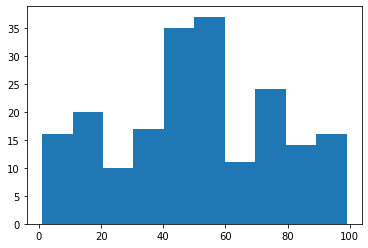

In [33]:
#Visualize distribution of target variable
plt.hist(mall_df['spending_score'])

In [34]:
#Descriptive statistics of numerical columns
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [35]:
mall_df.isna().sum()


customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

## Question 3 
Detect outliers using IQR.



In [36]:
#See the quantiles for age
mall_df['age'].quantile([0.25, 0.75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [39]:
#Store the quantiles in variables
age_q1, age_q3 = mall_df['age'].quantile([0.25, 0.75])

In [40]:
#Calculate the IQR
age_iqr = age_q3 - age_q1

age_iqr

20.25

In [41]:
#Calculate upper and lower bounds based on a k value of 1.5
age_upper = age_q3 + (age_iqr * 1.5)
age_lower = age_q1 - (age_iqr * 1.5)

age_upper, age_lower

(79.375, -1.625)

In [42]:
#Check for outliers in the age column
mall_df[mall_df['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


## Question 4 

Split data into train, validate, and test.



In [44]:
#Split my data into three subsets
seed = 42

mall_train, test_val = train_test_split(mall_df, train_size=0.7,
                                   random_state=seed)

mall_test, mall_val = train_test_split(test_val, train_size=0.5,
                                       random_state=seed)

mall_train.shape, mall_val.shape, mall_test.shape

((140, 5), (30, 5), (30, 5))

## Question 5 

Encode categorical columns using a one hot encoder (pd.get_dummies).



In [45]:
#Check get_dummies works as expected on my training data
pd.get_dummies(mall_train)

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
169,170,32,87,63,0,1
97,98,27,60,50,1,0
31,32,21,30,73,1,0
12,13,58,20,15,1,0
35,36,21,33,81,1,0
...,...,...,...,...,...,...
106,107,66,63,50,1,0
14,15,37,20,13,0,1
92,93,48,60,49,0,1
179,180,35,93,90,0,1


In [46]:
#Create the dataframe with dummies for gender and drop redundant column
mall_train = pd.get_dummies(mall_train)

mall_train.drop(columns=['gender_Male'], inplace=True)

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
169,170,32,87,63,0
97,98,27,60,50,1
31,32,21,30,73,1
12,13,58,20,15,1
35,36,21,33,81,1


## Question 6 
Handle missing values.



In [47]:
#Check for missing values
mall_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 169 to 102
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     140 non-null    int64
 1   age             140 non-null    int64
 2   annual_income   140 non-null    int64
 3   spending_score  140 non-null    int64
 4   gender_Female   140 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 5.6 KB


## Question 7 
Scaling

In [48]:
#Initialize the scaler and fit/transform a couple columns in my training data
mms = MinMaxScaler()

mall_train[['age', 'annual_income']] = mms.fit_transform(mall_train[['age',
                                                                     'annual_income']])

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
169,170,0.269231,0.590164,63,0
97,98,0.173077,0.368852,50,1
31,32,0.057692,0.122951,73,1
12,13,0.769231,0.040984,15,1
35,36,0.057692,0.147541,81,1
